In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

np.random.seed(0)
plt.style.use("ggplot")

1) პირველ სვეტში ჩაწერეთ სტაჟიორის პირადი 5 ნიშნა კოდი, რომელიც შესაძლოა იწყებოდეს 0-ებით, ყველასთვის განსხვავებული. (მაგალითად: 00012, 45397, 07634 და ა.შ.). (2 ქულა).

In [259]:
ids = np.random.choice(np.arange(0, 10), size=(70,5), replace=True)

real_ids = []
for d in ids:
    real_ids.append("".join(str(x) for x in d))

2) შემდეგ 30 სვეტში დააგენერირეთ HR-ის შეფასება შემთხვევითი მთელი რიცხვი 0, 100 შუალედიდან, სულ 70*30 = 2100 ჩანაწერი, რომლის 20% შემთხვევითად დატოვეთ ცარიელი. (2ქულა).

In [260]:
hr_scores = np.random.choice(np.arange(0, 101), size=(70, 30)).astype(float)


c = int((70 * 30) * .2)
mask = np.zeros(70 * 30, dtype = bool)
mask[:c] = True
np.random.shuffle(mask)
mask=mask.reshape(70, 30)
hr_scores[mask] = np.nan

In [261]:
df_hr = pd.concat([
    pd.DataFrame(real_ids, columns=["pid"]),
    pd.DataFrame(hr_scores)
], axis=1)
df_hr.to_excel("intern.xlsx", sheet_name="sheet1")

3) პირველ სვეტში გადმოიტანეთ sheet1-ში პირველ სვეტში არსებული ჩანაწერები.

4) შემდეგ 30 სვეტში დააგენერირეთ IT-ის შეფასება შემთხვევითი მთელი რიცხვი 0, 100 შუალედიდან, სულ 70*30 = 2100 ჩანაწერი, რომლის 25% შემთხვევითად დატოვეთ ცარიელი. (2ქულა).

In [262]:
it_scores = np.random.choice(np.arange(0, 101), size=(70, 30)).astype(float)


c = int((70 * 30) * .25)
mask = np.zeros(70 * 30, dtype = bool)
mask[:c] = True
np.random.shuffle(mask)
mask=mask.reshape(70, 30)
it_scores[mask] = np.nan

In [263]:
df_it = pd.concat([
    df_hr[["pid"]],
    pd.DataFrame(it_scores)
], axis=1)
df_it.to_excel("intern.xlsx", sheet_name="sheet2")

5) დაადგინეთ შეიძლება თუ არა გამოყენებული იყოს წრფივი რეგრესიის მოდელი HR-ის მიერ 30 დღის განმავლობაში მიღებულ შეფასებებსა და IT სამსახურის მიერ 30 დღის განმავლობაში მიღებულ შეფასებების კავშირის დადგენისა და პროგნოზირებისთვის, ააგეთ შესაბამისი მოდელი. (ამოცანაში შეძლება აიღოთ საშუალო შეფასებები, ჯამი ან სხვა რაიმე მახასიათებელი თითოეული სტაჟიორისთვის HR-ის და IT სამსახურის შეფასებებიდან, გაითვალისწინეთ HR-ის შეფასება არის დამოუკიდებელი X ცვლადი, ხოლო IT სამსახურის შეფასება დამოკიდებული y ცვლადი). (2 ქულა).


In [264]:
for col in df_hr.columns[1:]:
    df_hr[col] = df_hr[col].fillna(df_hr[col].mean())

In [265]:
for col in df_it.columns[1:]:
    df_it[col] = df_it[col].fillna(df_it[col].mean())

In [266]:
df_hr["mean_score"] = df_hr.iloc[:,1:].mean(axis=1)
df_it["mean_score"] = df_it.iloc[:,1:].mean(axis=1)

df_hr["sum_score"] = df_hr.iloc[:,1:].sum(axis=1)
df_it["sum_score"] = df_it.iloc[:,1:].sum(axis=1)

Text(0, 0.5, 'IT Sum Scores')

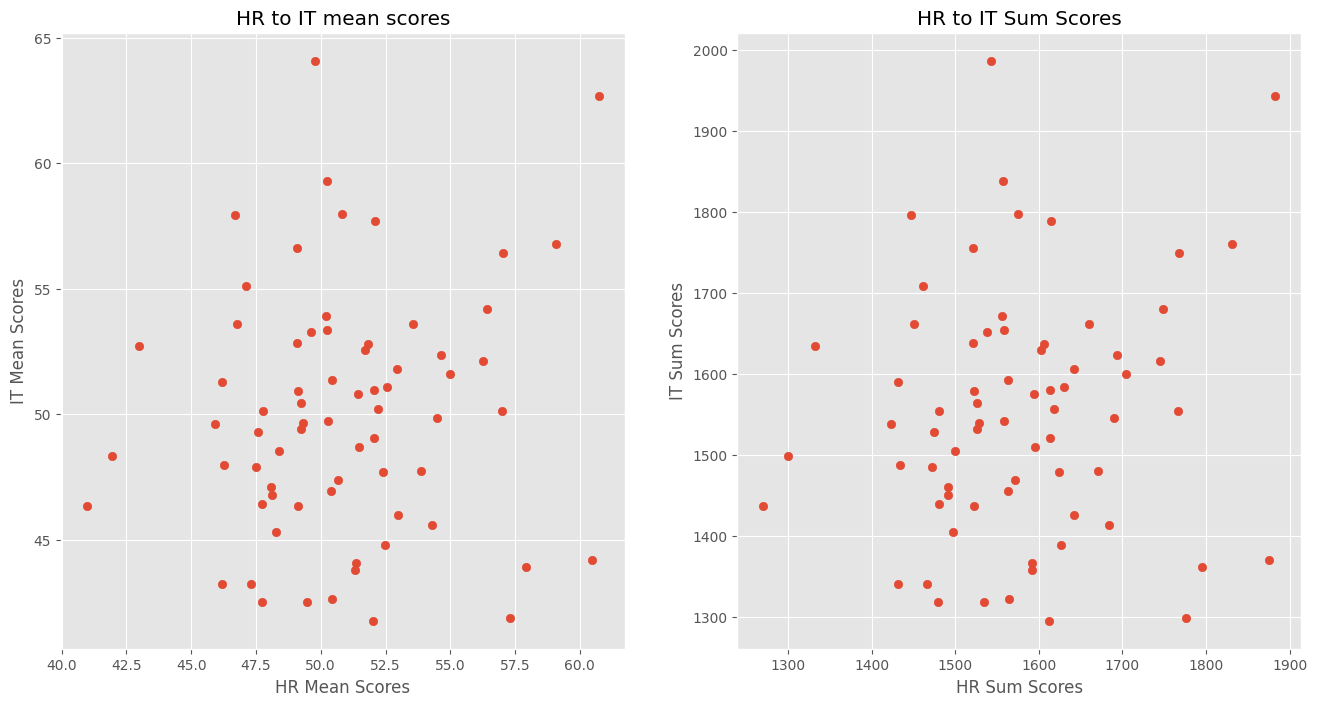

In [274]:
fig, axs = plt.subplots(1, 2, figsize = (16, 8))

axs[0].scatter(x=df_hr["mean_score"], y=df_it["mean_score"])
axs[0].set_title("HR to IT mean scores")
axs[0].set_xlabel("HR Mean Scores")
axs[0].set_ylabel("IT Mean Scores")

axs[1].scatter(x=df_hr["sum_score"], y=df_it["sum_score"])
axs[1].set_title("HR to IT Sum Scores")
axs[1].set_xlabel("HR Sum Scores")
axs[1].set_ylabel("IT Sum Scores")

In [292]:
X = df_hr.iloc[:,1:-2]
y = df_hr.iloc[:,1:-2]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.22, random_state=1)

In [293]:
model = LinearRegression()
model.fit(X_train, y_train)
# model.fit(X, y)

LinearRegression()

In [294]:
pred = model.predict(X_test)

pd.DataFrame([{
    "MAE": mean_absolute_error(y_test, pred),
    "MSE": mean_squared_error(y_test, pred)
}])

,MAE,MSE
0,6.118173e-14,6.321008e-27


In [296]:
X = df_hr.iloc[:,1:-2]
y = df_it["mean_score"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.22, random_state=1)

In [301]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [302]:
pred = model.predict(X_test)

pd.DataFrame([{
    "MAE": mean_absolute_error(y_test, pred),
    "MSE": mean_squared_error(y_test, pred)
}])

,MAE,MSE
0,3.457577,17.770806


6) შემთხვევითად შერჩეული რომელიმე ერთი სტაჟიორისთვის, ააგეთ IT სამსახურის მიერ შეფასებებისა და HR-ის შეფასებების დამოკიდებულების რეგრესიული მოდელი. (2 ქულა).

In [286]:
random_id = np.random.choice(df_hr["pid"])

In [287]:
random_hr = df_hr[df_hr["pid"] == random_id]
random_it = df_it[df_hr["pid"] == random_id]

In [288]:
X = df_hr.iloc[:,1:-2]
y = df_hr.iloc[:,1:-2]

In [290]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [291]:
pred = model.predict(X_test)

pd.DataFrame([{
    "MAE": mean_absolute_error(y_test, pred),
    "MSE": mean_squared_error(y_test, pred)
}])

,MAE,MSE
0,3.037469e-14,1.440717e-27
